In [1]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import numpy as np
import scipy

In [3]:
from parse.event import parse_files
from coordinates import ecef_to_enu, lla_to_ecef

In [4]:
# Begin program
events = list(parse_files("DroneData/testing2/path_*.txt"))
events.sort(key=lambda e:e.fields['prog_timestamp'])

In [5]:
lats = np.empty(len(events))
lons = np.empty(len(events))
alts = np.empty(len(events))

for i, event in enumerate(events):
    fields = event.fields
    lats[i] = fields['latitude']['value']
    lons[i] = fields['longitude']['value']
    alts[i] = fields['altitude']['value']

lats = np.radians(lats)
lons = np.radians(lons)

In [6]:
xs_e, ys_e, zs_e = lla_to_ecef(lats, lons, alts)

lat_o = lats[0]
lon_o = lons[0]
alt_o = alts[0]

x_e_o = xs_e[0]
y_e_o = ys_e[0]
z_e_o = zs_e[0]

xs, ys, zs = ecef_to_enu(lat_o, lon_o, x_e_o, y_e_o, z_e_o, xs_e, ys_e, zs_e)

<IPython.core.display.Javascript object>


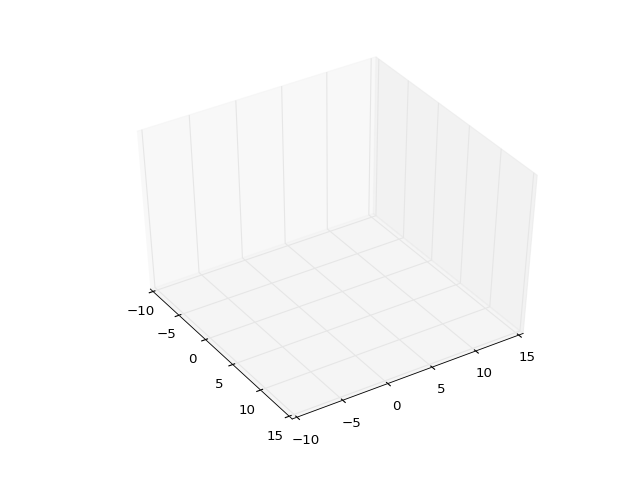

['_A', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_agg_filter', '_alpha', '_animated', '_antialiaseds', '_axes', '_clipon', '_clippath', '_contains', '_depthshade', '_edgecolor3d', '_edgecolors', '_edgecolors_original', '_facecolor3d', '_facecolors', '_facecolors_original', '_factor', '_get_bool', '_get_value', '_gid', '_hatch', '_is_filled', '_is_stroked', '_label', '_linestyles', '_linewidths', '_mouseover', '_offset_position', '_offsets', '_offsets3d', '_oid', '_path_effects', '_paths', '_picker', '_pickradius', '_prepare_points', '_propobservers', '_rasterized', '_remove_method', '_set_gc_clip', '_sizes', '_sketch', '_snap', '_stale', '_transOffset', '_transform', '_transformSet', '_transfo

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
s = 1
o = 0
s=ax.scatter(xs[o::s],ys[o::s],zs[o::s])
print(dir(s))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.draw()
background = fig.canvas.copy_from_bbox(ax.bbox)

def update_points(ax, indices):
    ax.clear()
    
    i = indices['i']
    f = i + 10
    x = xs[:i]
    y = ys[:i]
    z = zs[:i]
    s = ax.scatter(x, y)
    
    time = i / 5
    ax.set_title("time {} s".format(time), fontsize=15)
    indices['i'] += 10

timer = fig.canvas.new_timer(interval=100)
timer.add_callback(update_points, ax, dict(i=0))
timer.start()
